In [1]:
from IPython.display import FileLink

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)
library(RColorBrewer)
library(plyr); library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



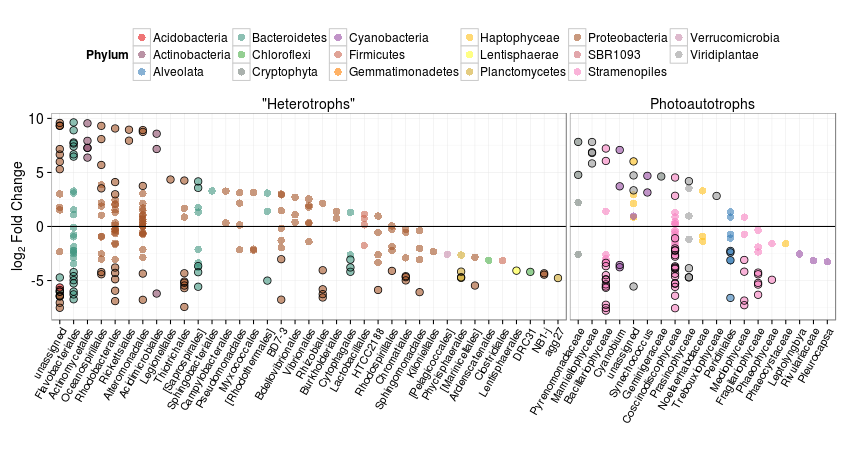

In [4]:
%%R -w 850 -h 450
FDR = 0.10 

b.l2fc = read.table("../data/BvP.l2fc.bact.csv", 
                sep = ",",
                header = TRUE,
                stringsAsFactors = FALSE) %>% filter(Rank2 != "Cyanobacteria")

b.l2fc[is.na(b.l2fc)] = "unassigned"

b.sort = b.l2fc %>%
    group_by(Rank4) %>%
    summarize(max.l2fc = max(log2FoldChange)) %>%
    arrange(desc(max.l2fc))

b.l2fc$Rank4 = factor(b.l2fc$Rank4, levels = b.sort$Rank4)

b.l2fc$x = b.l2fc$Rank4

b.l2fc$panel = '"Heterotrophs"'

a.l2fc = read.table("../data/BvP.l2fc.euk.csv", 
                sep = ",",
                header = TRUE,
                stringsAsFactors = FALSE)

a.l2fc[is.na(a.l2fc)] = "unassigned"

a.sort = a.l2fc %>%
    group_by(Rank4) %>%
    summarize(max.l2fc = max(log2FoldChange)) %>%
    arrange(desc(max.l2fc))

a.l2fc$Rank4 = factor(a.l2fc$Rank4, levels = a.sort$Rank4)

a.l2fc$x = a.l2fc$Rank4

a.l2fc$panel = "Photoautotrophs"

d = rbind.fill(a.l2fc, b.l2fc)
d[is.na(d)] = "unclassified"

colourCount = length(unique(d$Rank2))
getPalette = colorRampPalette(brewer.pal(10, "Set1"))

p = ggplot(d, aes(x = x, y = log2FoldChange, color = Rank2))

p = p + facet_grid(. ~ panel, scales = "free_x", space = "free_x")

p = p + geom_point(size = 3.5, alpha = 0.6)

p = p + geom_point(data = d %>% filter(padj <= FDR), size = 3.5, shape = 21, color = "black")

p = p + geom_hline(yintercept = 0)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 11), 
              axis.text.y = element_text(size = 14), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              legend.title = element_text(size = 12),
              legend.position = "top", 
              strip.background = element_blank())

p = p + guides(col = guide_legend(ncol = 7))
p = p + labs(x = "", color = "Phylum", y = expression(paste("", log[2]," Fold Change",sep="")))
p = p + scale_color_manual(values=getPalette(colourCount))

p

In [5]:
%%R
ggsave("figs/l2fc.pdf", p, w = 10.5, h = 5.5)

In [6]:
FileLink("figs/l2fc.pdf")

/home/chuck/working/carbon_subsidies_biofilm_plankton/BvP_manuscript_figures/figures_and_stats/figs/l2fc.pdf

In [17]:
%%R
b.l2fc %>%
    arrange(desc(abs(log2FoldChange))) %>%
    select(log2FoldChange, Rank2, Rank3) %>%
    filter(rank(desc(abs(log2FoldChange))) <= 5)

  log2FoldChange          Rank2               Rank3
1       9.630824  Bacteroidetes      Flavobacteriia
2       9.586249 Proteobacteria  Betaproteobacteria
3       9.548607 Actinobacteria      Actinobacteria
4       9.335597 Proteobacteria Alphaproteobacteria
5       9.311911 Proteobacteria Gammaproteobacteria


In [18]:
%%R
a.l2fc %>%
    arrange(desc(abs(log2FoldChange))) %>%
    select(log2FoldChange, Rank2, Rank3) %>%
    filter(rank(desc(abs(log2FoldChange))) <= 25)

   log2FoldChange         Rank2           Rank3
1        7.827962   Cryptophyta Pyrenomonadales
2        7.817524 Viridiplantae     Chlorophyta
3       -7.775310 Stramenopiles Bacillariophyta
4       -7.556676 Stramenopiles Bacillariophyta
5       -7.535492 Stramenopiles Bacillariophyta
6       -7.278180 Stramenopiles Bacillariophyta
7       -7.238075 Stramenopiles Bacillariophyta
8        7.217326 Stramenopiles Bacillariophyta
9        7.081879 Cyanobacteria   Chroococcales
10       6.872926 Viridiplantae     Chlorophyta
11      -6.850901 Stramenopiles Bacillariophyta
12       6.803092 Viridiplantae     Chlorophyta
13      -6.604395     Alveolata     Dinophyceae
14      -6.401723 Stramenopiles Bacillariophyta
15      -6.314332 Stramenopiles Bacillariophyta
16       6.066971 Stramenopiles Bacillariophyta
17       6.023116  Haptophyceae   Phaeocystales
18       5.835394 Viridiplantae     Chlorophyta
19      -5.668188 Stramenopiles Bacillariophyta
20      -5.583441 Stramenopiles Bacillar

In [24]:
%%R
a.l2fc %>%
    arrange(desc(abs(log2FoldChange))) %>%
    select(log2FoldChange, Rank2, Rank3) %>%
    filter(rank(desc(abs(log2FoldChange))) <= 25) %>%
    mutate(e = ifelse(log2FoldChange < 0, "b", "p")) %>%
    group_by(Rank2, Rank3, e) %>%
    summarize(N = n())

Source: local data frame [8 x 4]
Groups: Rank2, Rank3

          Rank2           Rank3 e  N
1     Alveolata     Dinophyceae b  1
2   Cryptophyta Pyrenomonadales p  1
3 Cyanobacteria   Chroococcales p  1
4  Haptophyceae   Phaeocystales p  1
5 Stramenopiles Bacillariophyta b 14
6 Stramenopiles Bacillariophyta p  2
7 Viridiplantae     Chlorophyta b  1
8 Viridiplantae     Chlorophyta p  4


In [9]:
%%R
sessionInfo()

R version 3.1.2 (2014-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] dplyr_0.3.0.2      plyr_1.8.1         RColorBrewer_1.0-5 ggplot2_1.0.0     

loaded via a namespace (and not attached):
 [1] assertthat_0.1   colorspace_1.2-4 DBI_0.3.1        digest_0.6.4    
 [5] grid_3.1.2       gtable_0.1.2     labeling_0.3     lazyeval_0.1.9  
 [9] magrittr_1.0.1   MASS_7.3-35      munsell_0.4.2    parallel_3.1.2  
[13] proto_0.3-10     Rcpp_0.11.3      reshape2_1.4     scales_0.2.4    
[17] stringr_0